          COD_PROD_01  COD_PROD_02  COD_PROD_03  COD_PROD_04  COD_PROD_05  \
NUM_FACT                                                                    
1000001           0.0       371.09         0.00          0.0         0.00   
1000002           0.0         0.00      2706.55          0.0         0.00   
1000003           0.0         0.00         0.00          0.0       593.01   
1000004           0.0         0.00      2281.24          0.0         0.00   
1000005           0.0         0.00       850.63          0.0         0.00   
...               ...          ...          ...          ...          ...   
1000896           0.0         0.00         0.00          0.0       856.57   
1000897           0.0         0.00         0.00          0.0       329.45   
1000898           0.0         0.00         0.00          0.0     31864.40   
1000899           0.0         0.00         0.00          0.0      1970.11   
1000900           0.0         0.00         0.00          0.0      4730.90   

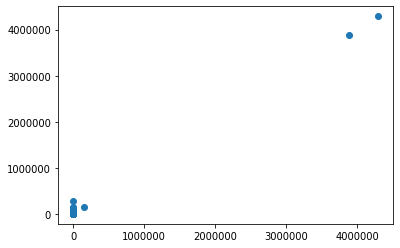

In [12]:
#Instalar en conso#Instalar en consola cmd: pip3 install xlrd
#Instalar en consola cmd: pip3 install csv
#Instalar en consola anaconda: conda install -c anaconda csvkit

#1. Importación de librerias a utilizar
import pandas as pd
import csv
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#2. Obtener data de origen
df = pd.read_excel('C:\\Users\\Intel\\Documents\\Mis documentos IDEA\\Samples\Exportaciones.ILB\\Tabladinámica10.xlsx', index_col=0)
print(df)
print(df.shape)
data_top=df.head()
df.head()

#3. Selección de columnas de trabajo
y_p = df['TOTAL']
X_p = df[['COD_PROD_06']]

#4. Gráfica de datos
plt.scatter(X_p, y_p)
plt.show()

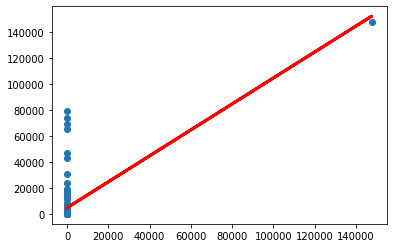

In [13]:
from sklearn.model_selection import train_test_split

#Separación de los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2)

from sklearn.preprocessing import PolynomialFeatures
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)

#Definición del algoritmo a utilizar
pr = linear_model.LinearRegression()

#Entreno el modelo
pr.fit(X_train_poli, y_train_p)

#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

#Graficamos los datos junto con el modelo
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, Y_pred_pr, color='red', linewidth=3)
plt.show()

In [14]:
print('Valor de la pendiente o coeficiente "a":')
print(pr.coef_)

print('Valor de la intersección o coeficiente "b":')
print(pr.intercept_)

print('Precisión del modelo:')
print(pr.score(X_train_poli, y_train_p))


Valor de la pendiente o coeficiente "a":
[0.00000000e+00 9.97661710e-01 2.85856028e-10]
Valor de la intersección o coeficiente "b":
4770.36083801128
Precisión del modelo:
0.9946042679573354


In [15]:
#Exportar resultados a csv
myData = [['Valor nulo','COD_PROD_06_x', 'COD_PROD_06_x^2','Constante'], [pr.coef_, pr.intercept_]]
myFile = open('C:\\Users\\Intel\\Documents\\Mis documentos IDEA\\Samples\Exportaciones.ILB\\Regresion_Polinomial01.csv', 'w')
with myFile:
   writer = csv.writer(myFile)
   writer.writerows(myData)